In [1]:
import modelframe as mf
import models as ms
import numpy as np
import torch
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

import plotutilities as pu
import datautilities as du


In [2]:
multi_model_directory = "../model/model-multi-uniform-001"

multi_features, multi_labels = du.read_in_data("../data/dataset_all_H1_bootstrap_O3a.npy", {0:0,1:1,2:2,3:3,4:4,5:5,6:6})

os.makedirs(f"{multi_model_directory}/figures", exist_ok=True)


def run_multi_network_uniform():
    

   

    multi_model = ms.GlitchClassifier_MultiClass_Optimized(6, 32, 7)

    multi_frame = mf.GlitchModel(multi_model, multi_features, multi_labels,{0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1}, device = 'cuda')
    multi_frame.number_of_epochs = 750
    multi_frame.learning_rate = 0.00001
    # multi_frame.label_weight_set = 

    multi_frame.setup(256*2)
    multi_frame.train()
    multi_frame.test_model()
    multi_frame.save_model(multi_model_directory, name = "model.pt")
    
    
    
    return multi_frame
    



In [3]:
multi_frame_1 = run_multi_network_uniform()

'100%'

'Epoch 750/750, Train Loss: 0.9404, Val Loss: 0.9553, Precision: 0.5271, Recall: 0.4000, Accuracy: 0.6651'

Train time: 189.70767164230347


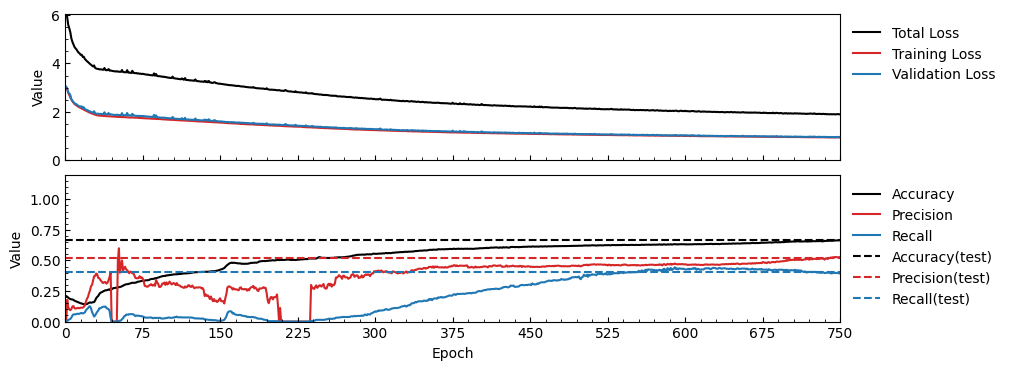

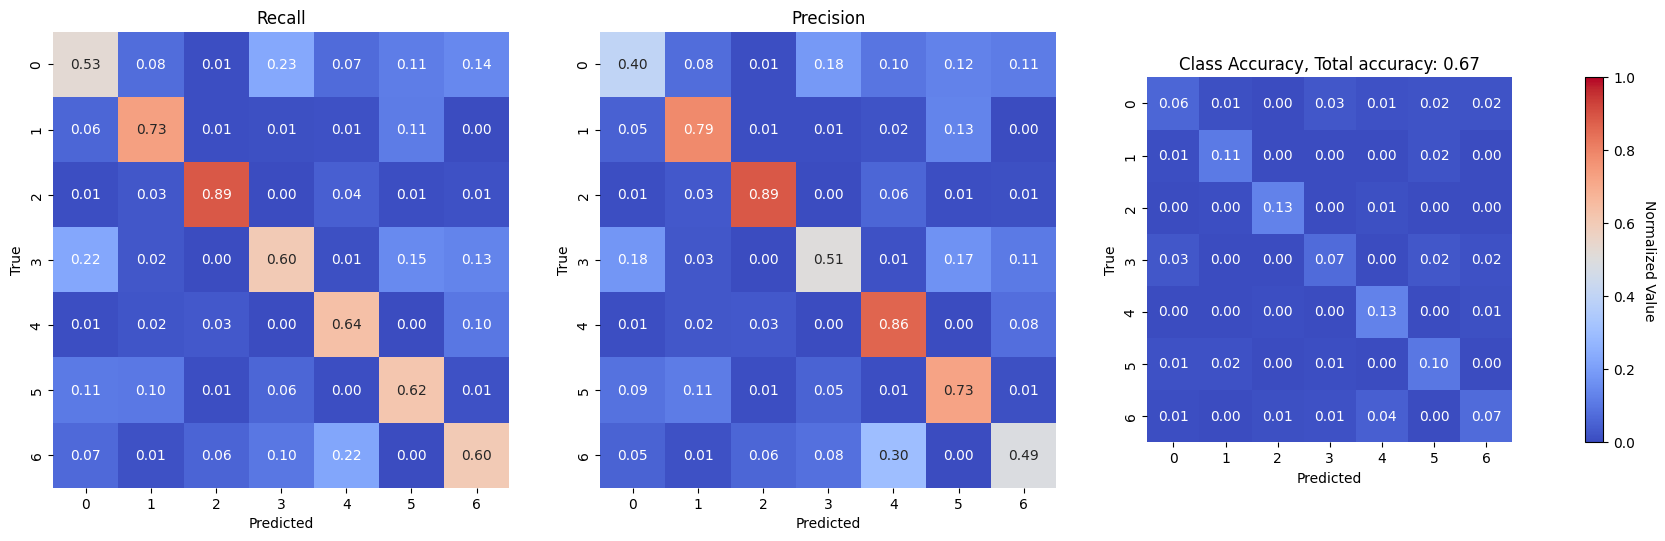

In [5]:
fig,ax = pu.plot_performance(multi_frame_1)
fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.png", bbox_inches = "tight")

fig, ax = pu.plot_recall_matrix(multi_frame_1)
fig.savefig(f"{multi_model_directory}/figures/recall-matrix-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/recall-matrix-1.png", bbox_inches = "tight")

fig, ax = pu.plot_precision_matrix(multi_frame_1)
fig.savefig(f"{multi_model_directory}/figures/precision-matrix-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/precision-matrix-1.png", bbox_inches = "tight")

fig, ax = pu.plot_accuracy_matrix(multi_frame_1)
fig.savefig(f"{multi_model_directory}/figures/accuracy-matrix-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/accuracy-matrix-1.png", bbox_inches = "tight")
